# Исследование технологического процесса очистки золота

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Просмотр-данных" data-toc-modified-id="Просмотр-данных-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Просмотр данных</a></span></li><li><span><a href="#Проверка-расчета-эффективности-обогащения" data-toc-modified-id="Проверка-расчета-эффективности-обогащения-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка расчета эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предообработка-данных" data-toc-modified-id="Предообработка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Предообработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Сравнение-концентраций-металлов" data-toc-modified-id="Сравнение-концентраций-металлов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Сравнение концентраций металлов</a></span></li><li><span><a href="#Сравнение-распределений-размеров-гранул-сырья" data-toc-modified-id="Сравнение-распределений-размеров-гранул-сырья-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Сравнение распределений размеров гранул сырья</a></span></li><li><span><a href="#Сравнение-суммарной-концентрации-веществ-на-разных-стадиях" data-toc-modified-id="Сравнение-суммарной-концентрации-веществ-на-разных-стадиях-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Сравнение суммарной концентрации веществ на разных стадиях</a></span></li><li><span><a href="#Подготовка-данных-для-модели" data-toc-modified-id="Подготовка-данных-для-модели-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Подготовка данных для модели</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

## Описание проекта

Необходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 
Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Для решения задачи нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

### Просмотр данных

Импортируем библиотеки, открываем файлы и просматриваем информацию.

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler 

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.dummy import DummyRegressor


In [5]:
try:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date')
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date')
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date')
except FileNotFoundError: 
    data_train = pd.read_csv('datasets/gold_recovery_train_new.csv', index_col='date')
    data_test = pd.read_csv('datasets/gold_recovery_test_new.csv', index_col='date')
    data_full = pd.read_csv('datasets/gold_recovery_full_new.csv', index_col='date')

In [6]:
data_train

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [7]:
data_test

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289

In [8]:
data_full

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.

In [9]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         14148 non-null  float64
 1   final.output.concentrate_pb                         14148 non-null  float64
 2   final.output.concentrate_sol                        13938 non-null  float64
 3   final.output.concentrate_au                         14149 non-null  float64
 4   final.output.recovery                               14149 non-null  float64
 5   final.output.tail_ag                                14149 non-null  float64
 6   final.output.tail_pb                                14049 non-null  float64
 7   final.output.tail_sol                               14144 non-null  float64
 8   final.output.tail_au                             

In [10]:
# Оцениваем количество пропусков
data_train.isna().mean().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           0.113436
rougher.state.floatbank10_e_air             0.030815
rougher.input.floatbank11_xanthate          0.030249
primary_cleaner.output.concentrate_sol      0.020213
secondary_cleaner.state.floatbank2_a_air    0.015337
                                              ...   
rougher.state.floatbank10_d_air             0.000000
rougher.output.concentrate_au               0.000000
rougher.output.recovery                     0.000000
rougher.output.tail_pb                      0.000000
rougher.output.concentrate_ag               0.000000
Length: 86, dtype: float64

In [11]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   primary_cleaner.input.sulfate               5286 non-null   float64
 1   primary_cleaner.input.depressant            5285 non-null   float64
 2   primary_cleaner.input.feed_size             5290 non-null   float64
 3   primary_cleaner.input.xanthate              5286 non-null   float64
 4   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 5   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 6   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 8   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_level    5290 non-null

In [12]:
# пропуски в тестовой выборке
data_test.isna().mean().sort_values(ascending=False)

rougher.input.floatbank11_xanthate            0.004726
rougher.input.feed_sol                        0.003970
secondary_cleaner.state.floatbank3_a_air      0.001701
rougher.input.floatbank11_sulfate             0.001512
primary_cleaner.input.depressant              0.000945
rougher.input.floatbank10_sulfate             0.000945
primary_cleaner.input.sulfate                 0.000756
primary_cleaner.input.xanthate                0.000756
rougher.input.feed_rate                       0.000567
secondary_cleaner.state.floatbank2_a_air      0.000567
secondary_cleaner.state.floatbank2_b_air      0.000378
rougher.input.feed_size                       0.000189
secondary_cleaner.state.floatbank3_b_level    0.000000
secondary_cleaner.state.floatbank3_b_air      0.000000
rougher.state.floatbank10_f_air               0.000000
rougher.state.floatbank10_f_level             0.000000
secondary_cleaner.state.floatbank6_a_air      0.000000
secondary_cleaner.state.floatbank5_b_level    0.000000
secondary_

In [13]:
data_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   final.output.concentrate_ag                         19438 non-null  float64
 1   final.output.concentrate_pb                         19438 non-null  float64
 2   final.output.concentrate_sol                        19228 non-null  float64
 3   final.output.concentrate_au                         19439 non-null  float64
 4   final.output.recovery                               19439 non-null  float64
 5   final.output.tail_ag                                19438 non-null  float64
 6   final.output.tail_pb                                19338 non-null  float64
 7   final.output.tail_sol                               19433 non-null  float64
 8   final.output.tail_au                             

In [14]:
# Пропуски в исходных данных
data_full.isna().mean().sort_values(ascending=False)

secondary_cleaner.output.tail_sol           0.089922
rougher.input.floatbank11_xanthate          0.023304
rougher.state.floatbank10_e_air             0.022429
primary_cleaner.output.concentrate_sol      0.019034
secondary_cleaner.state.floatbank2_a_air    0.011317
                                              ...   
rougher.state.floatbank10_d_level           0.000000
rougher.state.floatbank10_d_air             0.000000
rougher.output.tail_sol                     0.000000
rougher.output.tail_au                      0.000000
rougher.output.concentrate_ag               0.000000
Length: 86, dtype: float64

**Описание данных**

*Технологический процесс* 

* Rougher feed — исходное сырье

* Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant

* Xanthate **— ксантогенат (промотер, или активатор флотации);

* Sulphate — сульфат (на данном производстве сульфид натрия);

* Depressant — депрессант (силикат натрия).

* Rougher process (англ. «грубый процесс») — флотация

* Rougher tails — отвальные хвосты

* Float banks — флотационная установка

* Cleaner process — очистка

* Rougher Au — черновой концентрат золота

* Final Au — финальный концентрат золота

*Параметры этапов* 

* air amount — объём воздуха

* fluid levels — уровень жидкости

* feed size — размер гранул сырья

* feed rate — скорость подачи

*Наименование признаков*

Наименование признаков должно быть такое:

[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

*Возможные значения для блока [этап]:* 

* rougher — флотация

* primary_cleaner — первичная очистка

* secondary_cleaner — вторичная очистка

* final — финальные характеристики

*Возможные значения для блока [тип_параметра]:*

* input — параметры сырья

* output — параметры продукта

* state — параметры, характеризующие текущее состояние этапа

* calculation — расчётные характеристики


Данные все имеют числовые значения, в данных есть пропуски, которые в дальнейшем обработаем.

### Проверка расчета эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака rougher.output.recovery. Найдем MAE между нашими расчётами и значением признака. 

Эффективность обогащения рассчитывается по формуле

**recovery = C * (F - T) / (F * (C - T)) * 100%**

* C — доля золота в концентрате после флотации/очистки;

* F — доля золота в сырье/концентрате до флотации/очистки;

* T — доля золота в отвальных хвостах после флотации/очистки.

In [15]:
data_train.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

* C = rougher.output.concentrate_au 

* F = rougher.input.feed_au

* T = rougher.output.tail_au 

Мы определили значения для подстановки в формулу, теперь напишем функцию для расчета. 

In [16]:
def recovery(C, F, T):
    recovery = (C * (F - T) / (F * (C - T))) * 100
    return recovery

In [17]:
# Применяем функцию к нашим данным и сохраняем результат в столбце "recovery_calc"
data_train['recovery_calc'] = recovery(data_train['rougher.output.concentrate_au'], 
                                       data_train['rougher.input.feed_au'], data_train['rougher.output.tail_au'])


In [18]:
# Среднее по нашим расчетам
data_train['recovery_calc'].mean()

82.70450164550269

In [19]:
# Среднее по данным в таблице
data_train['rougher.output.recovery'].mean()

82.70450164550267

In [20]:
# Средняя абсолютная ошибка меджу расчитанными и имеющимися данными
MAE = mean_absolute_error( data_train['rougher.output.recovery'], data_train['recovery_calc'])
MAE

9.73512347450521e-15

Значение МАЕ между расчётами и значением признака очень мало, можем сделать вывод, что эффективность обогащения рассчитана правильно, данные в таблице корректны.

### Анализ признаков, недоступных в тестовой выборке

В тествой выборке отстутствуют признаки, которые получены уже после процесса очистки. Они не могут использоваться для обучения и прогнозирования, поэтому мы их удалим. 


Нужно спрогнозировать сразу две величины:
* эффективность обогащения чернового концентрата `rougher.output.recovery`;
* эффективность обогащения финального концентрата `final.output.recovery`. 

Эти данные не будем удалять из обучающей выборки. 

In [21]:
cols_to_drop = []
for i in data_train.columns:
    if i not in data_test.columns and i != 'rougher.output.recovery' and i != 'final.output.recovery':
        cols_to_drop.append(i)
        print(i)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.output.tail_sol
secondary_cleaner.output.tail_

In [22]:
data_train = data_train.drop(columns=cols_to_drop)

In [23]:
data_train

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,70.541216,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,87.107763,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,69.266198,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,86.843261,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,68.116445,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,86.842308,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,68.347543,122.270188,11.322140,7.25,0.996739,1599.968720,-500.951778,1600.659236,-499.677094,1600.304144,-500.727997,1600.449520,-500.052575,6.043309,2.037807,542.590390,57.792734,

### Предообработка данных

Данные индексируются датой и временем получения информации (признак date). Соседние по времени параметры часто похожи. Поэтому пропуски в исходных данных заменим методом forwardfill, a date установили в качестве индекса при открытии файлов. 

In [24]:
data_full.isna().sum()

final.output.concentrate_ag                     1
final.output.concentrate_pb                     1
final.output.concentrate_sol                  211
final.output.concentrate_au                     0
final.output.recovery                           0
                                             ... 
secondary_cleaner.state.floatbank5_a_level      1
secondary_cleaner.state.floatbank5_b_air        1
secondary_cleaner.state.floatbank5_b_level      1
secondary_cleaner.state.floatbank6_a_air        2
secondary_cleaner.state.floatbank6_a_level      1
Length: 86, dtype: int64

In [25]:
data_full.fillna(method='ffill', inplace=True)

In [26]:
data_full.isna().sum()

final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
final.output.recovery                         0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 86, dtype: int64

In [27]:
data_train.isna().sum()

final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate              29


In [28]:
data_train['rougher.output.recovery'].mean()

82.70450164550267

In [29]:
# В обучающей и тестовой выборке заменим пропуски методом update
data_train.update(data_full) 

In [30]:
data_train['rougher.output.recovery'].mean() # значения целевого признака не изменились, пропуски заполнены корректно.

82.70450164550267

In [31]:
data_train.isna().sum()

final.output.recovery                         0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

In [32]:
data_test.isna().sum()

primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatbank10_xanthate             0
rougher.input.floatb

In [33]:
data_test['rougher.input.floatbank10_xanthate'].mean()

6.467744880071942

In [34]:
data_test.update(data_full)

In [35]:
data_test.shape

(5290, 52)

In [36]:
data_test['rougher.input.floatbank10_xanthate'].mean() # пропуски заполнены корректно, данные без пропусков не изменились

6.467744880071942

In [37]:
data_test.isna().sum()

primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate       

В тестовую выборку добавим целевые признаки из исходных данных для последующей проверки модели.

In [38]:
data_test['final.output.recovery'] = data_full['final.output.recovery']
data_test['rougher.output.recovery'] = data_full['rougher.output.recovery']

In [39]:
data_test.shape

(5290, 54)

In [40]:
data_test.tail(3)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,final.output.recovery,rougher.output.recovery
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-12-31 21:59:59,171.135718,15.993669,8.07,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,-520.667442,1502.585343,-498.260225,11.285908,4.405327,546.306868,73.647513,41.095485,10.169094,10.182219,7.196255,10.185461,7.198676,1396.203070,-300.210722,1047.879742,-499.604248,948.963429,-499.549567,856.325597,-500.095616,850.614597,-499.473713,850.279578,-498.508374,29.075948,-500.528402,26.888005,-500.975799,28.000224,-500.565876,22.996528,-500.477583,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882,67.092759,93.018138
2017-12-31 22:59:59,179.697158,15.438979,8.07,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,-487.479567,1502.688918,-501.569723,11.289710,4.343488,547.331405,78.066446,41.715740,10.071156,10.730915,7.200058,10.726349,7.200834,1403.942288,-300.030119,1049.802289,-499.795576,950.769390,-500.374645,847.647198,-499.920332,849.413040,-500.380529,850.075026,-500.478250,29.103185,-499.692672,27.051742,-499.858337,27.980387,-499.907225,23.046562,-499.744914,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284,68.061186,92.599042
2017-12-31 23:59:59,181.556856,14.995850,8.07,1.623454,1498.096303,-499.796922,1501.743791,-505.146931,1499.535978,-492.428226,1499.674340,-499.766717,10.904646,4.090591,564.540376,77.678700,40.891121,9.697259,10.789493,7.195776,10.792881,7.201037,1400.611544,-299.989405,1052.782756,-499.762966,950.793740,-499.357170,850.639537,-500.433782,850.370801,-500.819351,850.680188,-498.539198,29.098116,-500.429872,26.892401,-500.087131,28.023491,-500.170406,23.013559,-500.218801,20.034715,-500.728588,14.914199,-499.948518,10.986607,-500.658027,8.989497,-500.337588,8.988632,-500.764937,71.699976,91.177695


In [41]:
# корреляция признаков
corr_table = data_train.corr()

In [42]:
corr_table

,final.output.recovery,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.recovery,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
final.output.recovery,1.000000,0.384798,0.155639,0.067157,0.214886,0.133526,0.028631,0.148987,0.042755,0.143670,0.028894,0.058578,-0.017229,0.310574,0.205706,0.169602,0.048866,0.261590,0.308561,-0.013655,0.328838,0.019862,0.305498,0.328307,0.228755,0.093931,-0.148411,-0.084320,-0.183531,-0.093720,-0.179362,-0.094237,-0.130293,-0.094668,-0.092098,-0.092495,0.147045,0.003783,0.122951,0.000455,0.187641,0.031709,0.038290,0.011031,0.209659,0.057357,0.170796,-0.089021,0.098198,0.024159,0.068281,0.043815,-0.027253,-0.035782
primary_cleaner.input.sulfate,0.384798,1.000000,0.484178,0.166952,0.261111,0.028847,-0.013909,0.049839,-0.027622,0.049544,-0.001592,0.107193,-0.019518,0.541870,0.558860,0.318932,-0.075122,0.364885,0.606508,0.376819,0.392475,0.488006,0.427297,0.272823,0.204769,0.073873,-0.227703,-0.219554,-0.253974,-0.221854,-0.291650,-0.221254,-0.262478,-0.225754,-0.238906,-0.226807,0.129323,0.103041,0.138515,0.122921,0.082193,-0.012181,0.003893,-0.040872,0.087795,0.032176,0.110808,-0.064222,-0.006189,-0.030974,0.000540,-0.024671,-0.104186,-0.142148
primary_cleaner.input.depressant,0.155639,0.484178,1.000000,0.164661,0.279177,-0.137417,0.138460,-0.100224,0.142768,-0.111311,0.158314,-0.088144,0.065261,0.475868,0.284461,0.160363,-0.082113,0.087134,0.422332,0.165096,0.370096,0.275426,0.416953,0.041395,-0.033654,-0.260545,-0.118682,-0.322407,-0.147866,-0.320626,-0.136092,-0.321012,-0.041085,-0.325709,-0.072578,-0.329509,-0.059692,0.186342,0.074894,0.178166,-0.174024,-0.077966,0.014519,0.013853,-0.234961,-0.160380,-0.136718,-0.265370,-0.260361,-0.157909,-0.222290,-0.153263,-0.172731,-0.121510
primary_cleaner.input.feed_size,0.067157,0.166952,0.164661,1.000000,-0.010052,-0.130389,0.079695,-0.129652,0.081212,-0.154342,0.080218,-0.197896,0.070927,0.108266,-0.092816,0.082891,-0.140931,0.066410,0.129244,0.089772,0.021669,0.146025,0.058854,-0.012795,-0.209612,-0.355117,0.176426,0.077054,0.186982,0.067978,0.188834,0.065130,0.143565,0.063053,0.130231,0.063007,-0.173963,0.103736,-0.132745,0.082897,-0.153009,0.096498,0.012768,0.134397,-0.326284,0.112642,-0.247270

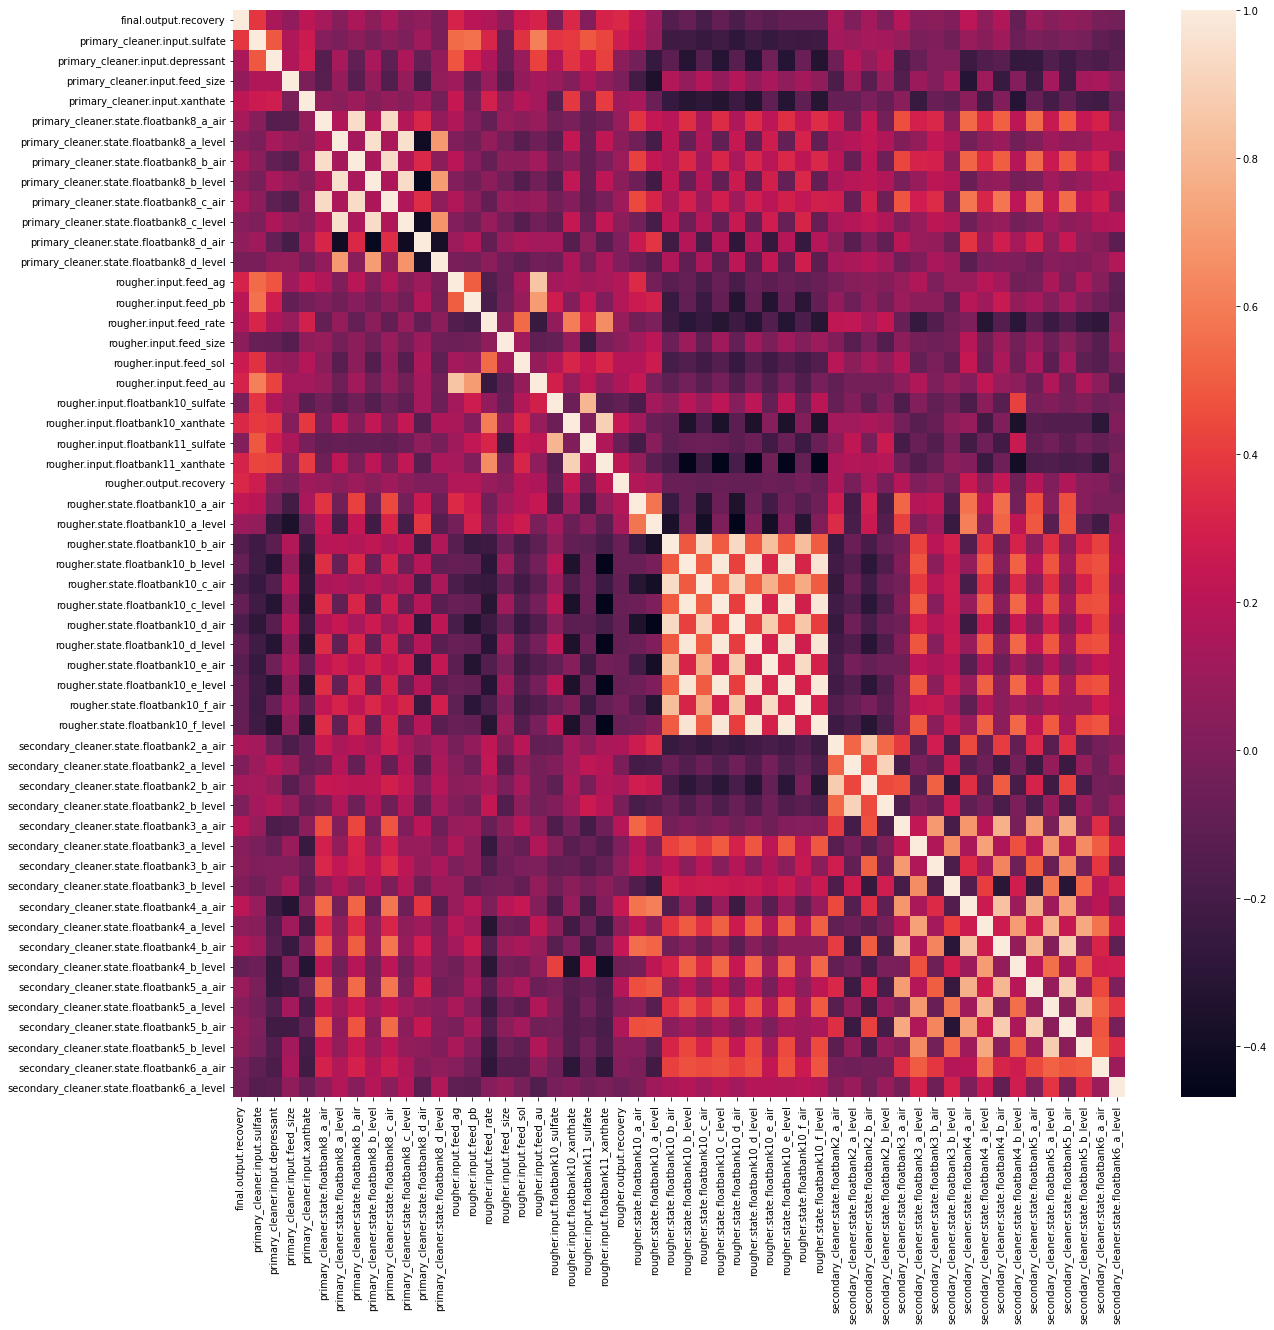

In [43]:
plt.figure(figsize=(20, 20))
sns.heatmap(corr_table);

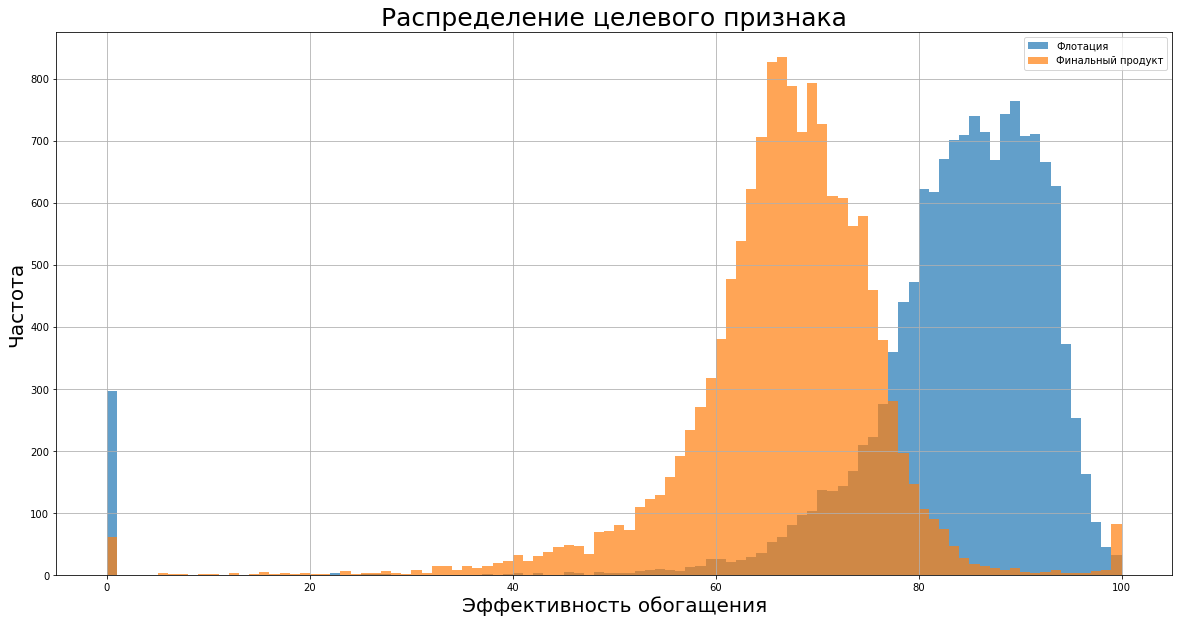

In [44]:
plt.figure(figsize=(20, 10))
data_train['rougher.output.recovery'].hist(bins=100, alpha=0.7)
data_train['final.output.recovery'].hist(bins=100, alpha=0.7)
plt.xlabel('Эффективность обогащения', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение целевого признака', fontsize=25)
plt.legend(['Флотация','Финальный продукт']);

По графикам видны выбросы, где эффективность обогащения равна 0. Такие выбросы нужно  будет удалить.


## Анализ данных

### Сравнение концентраций металлов

 Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

*Этапы очистки:*  

* rougher — флотация

* primary_cleaner — первичная очистка

* secondary_cleaner — вторичная очистка

* final — финальные характеристики


*Металлы : Au, Ag, Pb* 
      

In [45]:
data_full.columns

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state

Значит, нужно рассмотреть данные: 

       'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 
       'rougher.output.concentrate_au',

       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_au',
       
       'final.output.concentrate_ag',
       'final.output.concentrate_pb',
       'final.output.concentrate_au'     

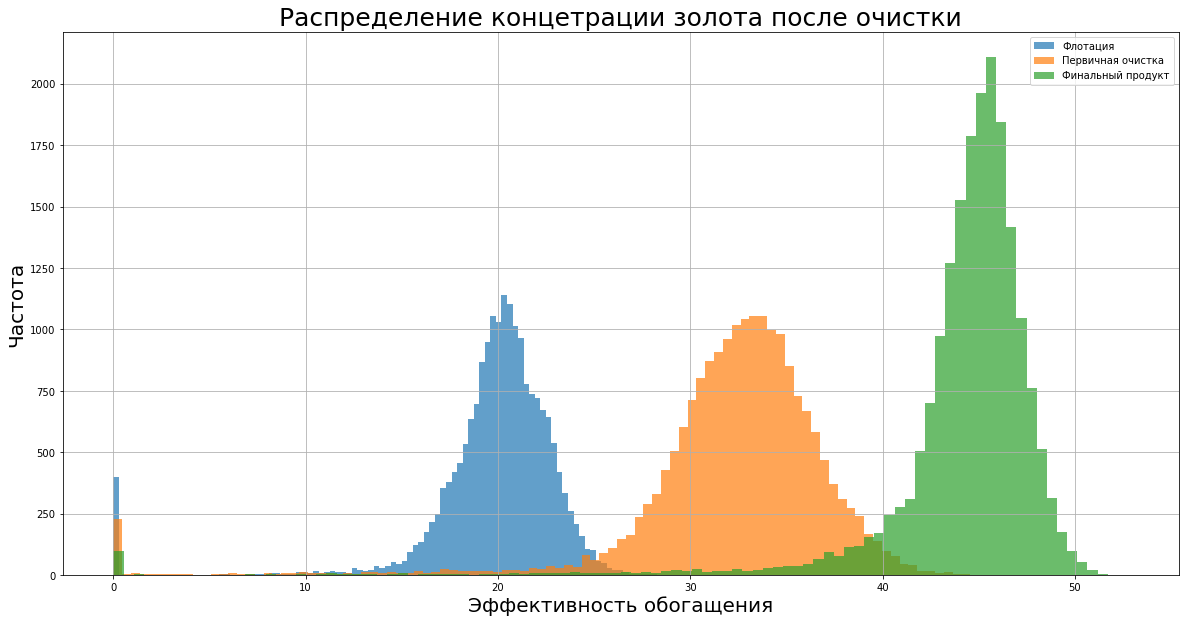

In [46]:
plt.figure(figsize=(20, 10))
data_full['rougher.output.concentrate_au'].hist(bins=100, alpha=0.7)
data_full['primary_cleaner.output.concentrate_au'].hist(bins=100, alpha=0.7)
data_full['final.output.concentrate_au'].hist(bins=100, alpha=0.7)
plt.xlabel('Эффективность обогащения', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение концетрации золота после очистки', fontsize=25)
plt.legend(['Флотация','Первичная очистка','Финальный продукт']);

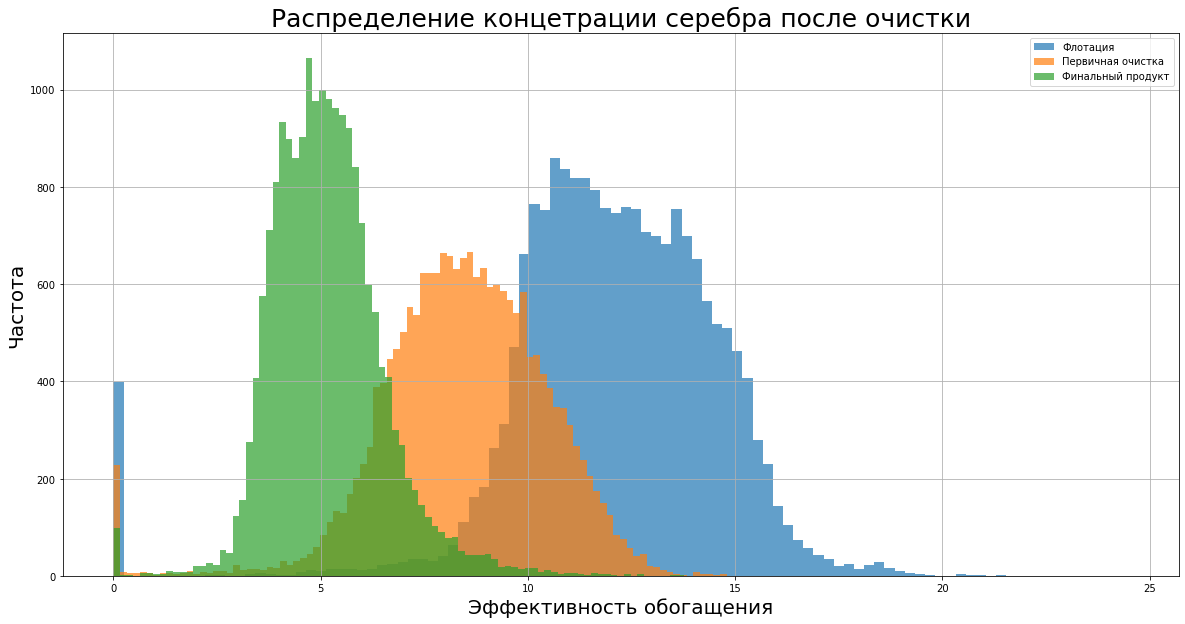

In [47]:
plt.figure(figsize=(20, 10))
data_full['rougher.output.concentrate_ag'].hist(bins=100, alpha=0.7)
data_full['primary_cleaner.output.concentrate_ag'].hist(bins=100, alpha=0.7)
data_full['final.output.concentrate_ag'].hist(bins=100, alpha=0.7)
plt.xlabel('Эффективность обогащения', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение концетрации серебра после очистки', fontsize=25)
plt.legend(['Флотация','Первичная очистка','Финальный продукт']);

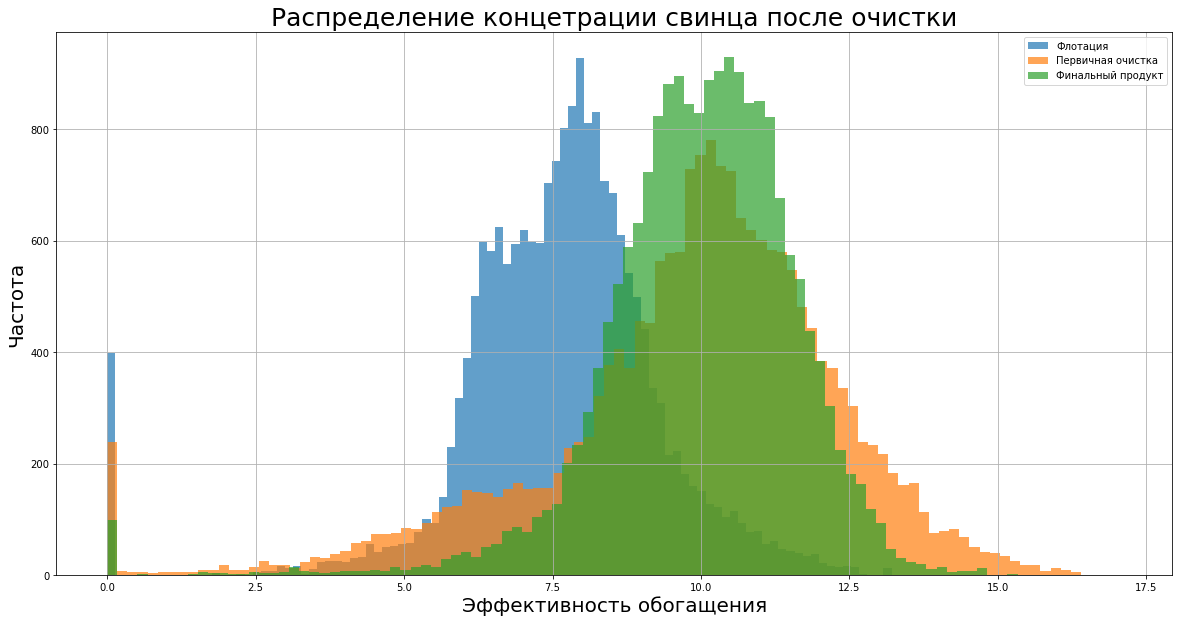

In [48]:
plt.figure(figsize=(20, 10))
data_full['rougher.output.concentrate_pb'].hist(bins=100, alpha=0.7)
data_full['primary_cleaner.output.concentrate_pb'].hist(bins=100, alpha=0.7)
data_full['final.output.concentrate_pb'].hist(bins=100, alpha=0.7)
plt.xlabel('Эффективность обогащения', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение концетрации свинца после очистки', fontsize=25)
plt.legend(['Флотация','Первичная очистка','Финальный продукт']);

У золота концентрация повышается в результате очистки, в чем и заключается смысл этого процесса. Концетрация серебра с каждым этапом очистки уменьшается. Концентрация свинца незначительно увеличивается после флотации с 7.5 до 10% на этапе первичной очитке и финальном этапе, т.к. это побочный продукт химических реакций.

### Сравнение распределений размеров гранул сырья

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

* feed size — размер гранул сырья 

Для сравнения нам будут нужны данные из столбцов `rougher.input.feed_size`, `primary_cleaner.input.feed_size`

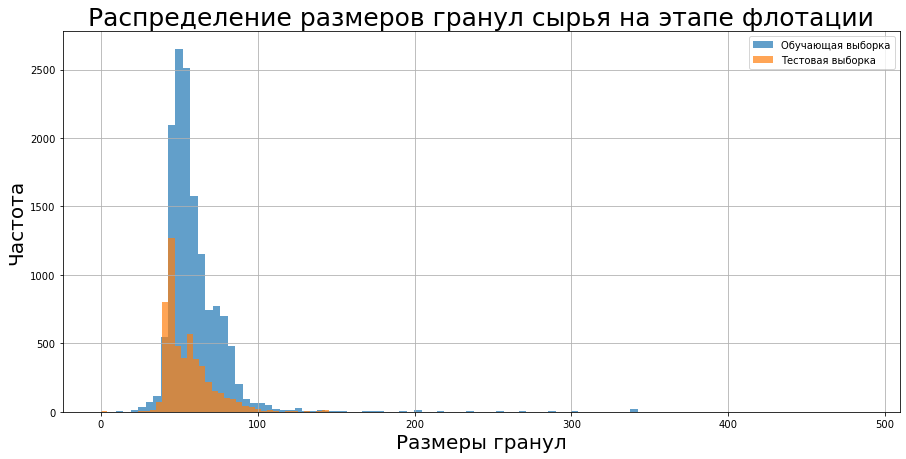

In [59]:
plt.figure(figsize=(15, 7))
data_train['rougher.input.feed_size'].hist(bins=100, alpha=0.7)
data_test['rougher.input.feed_size'].hist(bins=100, alpha=0.7)
plt.xlabel('Размеры гранул', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение размеров гранул сырья на этапе флотации', fontsize=25)
plt.legend(['Обучающая выборка','Тестовая выборка']);

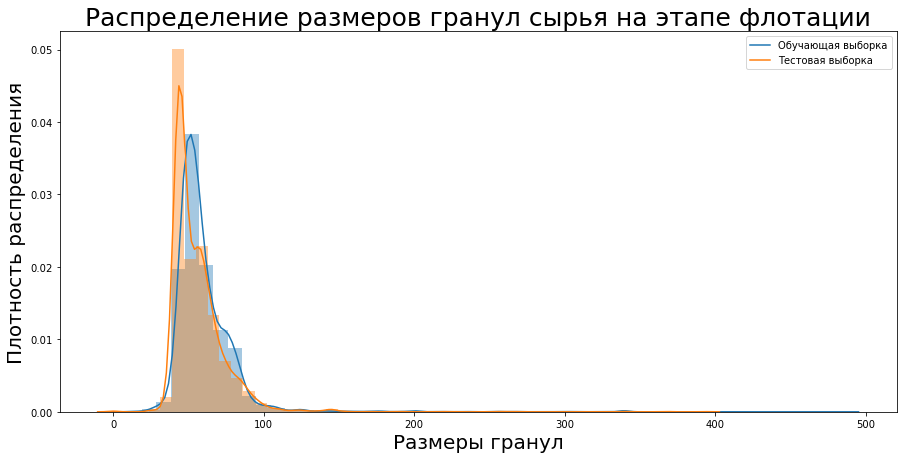

In [58]:
plt.figure(figsize=(15, 7))
sns.distplot(data_train['rougher.input.feed_size'])
sns.distplot(data_test['rougher.input.feed_size'])
plt.xlabel('Размеры гранул', fontsize=20)
plt.ylabel('Плотность распределения', fontsize=20)
plt.title('Распределение размеров гранул сырья на этапе флотации', fontsize=25)
plt.legend(['Обучающая выборка','Тестовая выборка']);

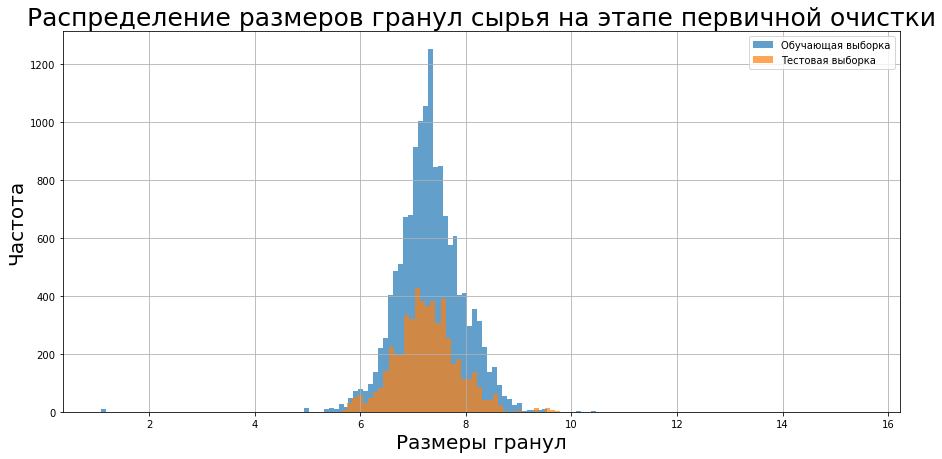

In [60]:
plt.figure(figsize=(15, 7))
data_train['primary_cleaner.input.feed_size'].hist(bins=100, alpha=0.7)
data_test['primary_cleaner.input.feed_size'].hist(bins=100, alpha=0.7)
plt.xlabel('Размеры гранул', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение размеров гранул сырья на этапе первичной очистки', fontsize=25)
plt.legend(['Обучающая выборка', 'Тестовая выборка']);

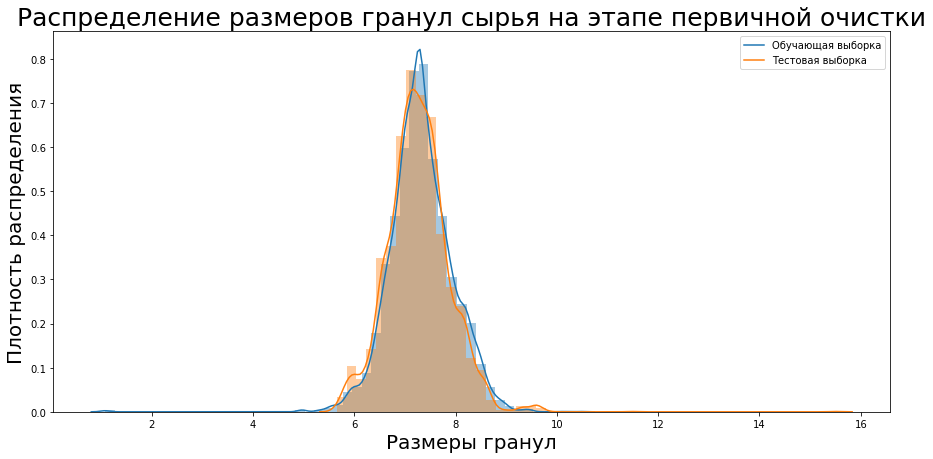

In [62]:
plt.figure(figsize=(15, 7))
sns.distplot(data_train['primary_cleaner.input.feed_size'])
sns.distplot(data_test['primary_cleaner.input.feed_size'])
plt.xlabel('Размеры гранул', fontsize=20)
plt.ylabel('Плотность распределения', fontsize=20)
plt.title('Распределение размеров гранул сырья на этапе первичной очистки', fontsize=25)
plt.legend(['Обучающая выборка', 'Тестовая выборка']);

Распределения размеров гранул на тестовой и обучающей выборках похожи, в целом размеры большинства частиц лежат в оптимальном интервале 40—100 мкм для обоих выборок, поэтому оценка модели будет корректной.

### Сравнение суммарной концентрации веществ на разных стадиях

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.


Для этого используем следующие данные:

       'rougher.input.feed_ag',
       'rougher.input.feed_pb',
       'rougher.input.feed_sol',
       'rougher.input.feed_au'
       
       
       'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 
       'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au'
        
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       
       'final.output.concentrate_ag', 
       'final.output.concentrate_pb',
       'final.output.concentrate_sol', 
       'final.output.concentrate_au',
        

In [63]:
# Суммируем концентрации на каждой стадии

rougher_input = data_full['rougher.input.feed_ag'] + data_full['rougher.input.feed_pb'] + data_full[
    'rougher.input.feed_sol'] + data_full['rougher.input.feed_au']

rougher = data_full['rougher.output.concentrate_ag'] + data_full['rougher.output.concentrate_pb'] + data_full[
    'rougher.output.concentrate_sol'] + data_full['rougher.output.concentrate_au']

primary_cleaner = data_full['primary_cleaner.output.concentrate_ag'] + data_full[
    'primary_cleaner.output.concentrate_pb'] + data_full['primary_cleaner.output.concentrate_sol'] + data_full[
    'primary_cleaner.output.concentrate_au']

final = data_full['final.output.concentrate_ag'] + data_full['final.output.concentrate_pb'] + data_full[
    'final.output.concentrate_sol'] + data_full['final.output.concentrate_au']

In [64]:
# Функция для построения графиков
def plots(data, stage_name):
    plt.figure(figsize=(15, 8))
    sns.distplot(data)
    plt.xlabel('Концентрация веществ', fontsize=20)
    plt.ylabel('Плотность распределения', fontsize=20)
    plt.title(f'Суммарная концентрация веществ  {stage_name}',  fontsize=25);

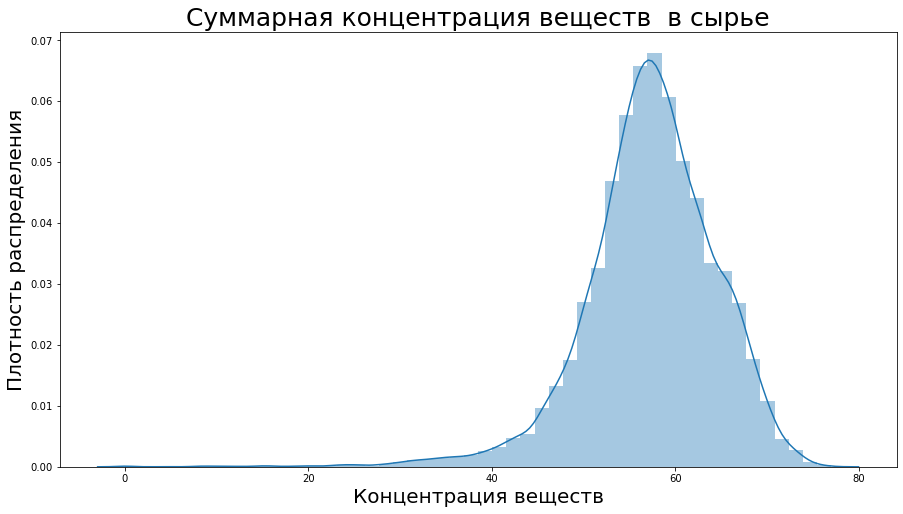

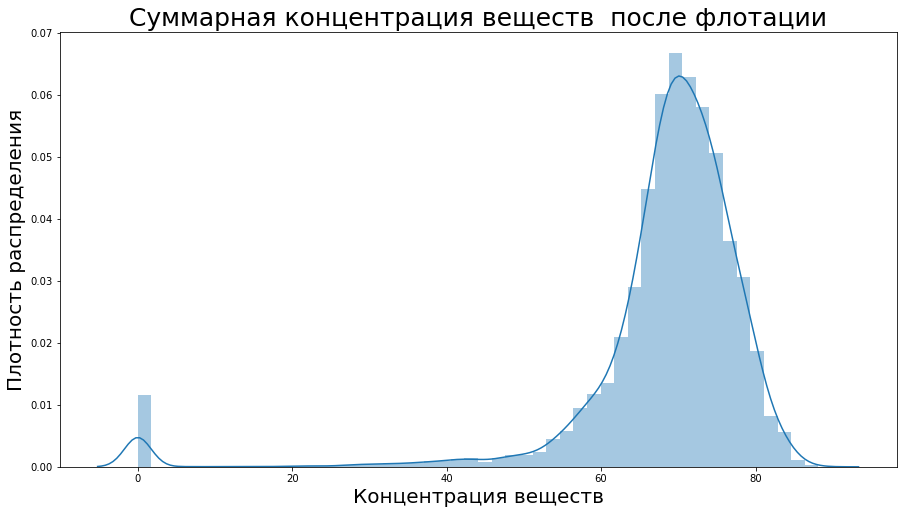

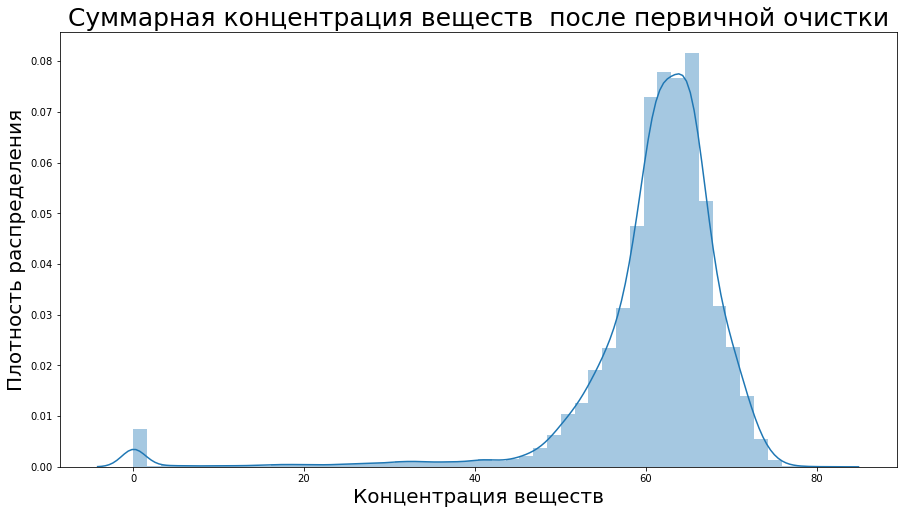

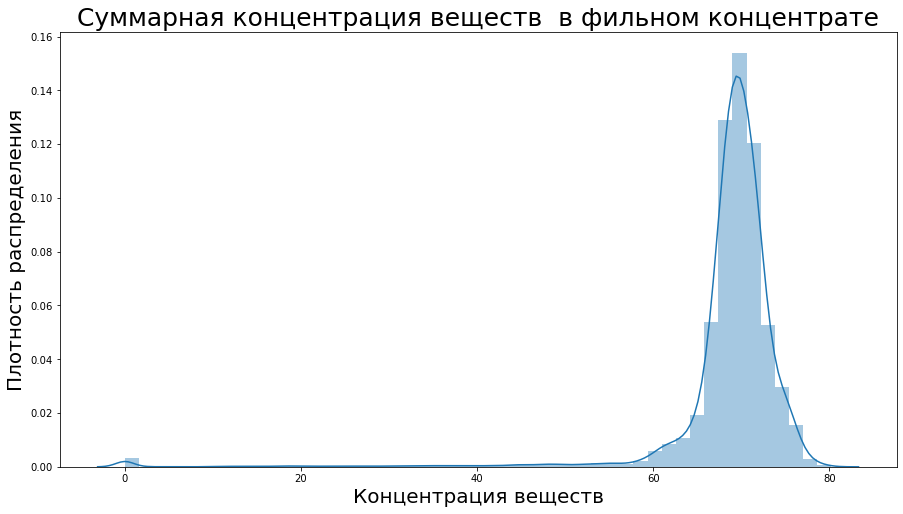

In [65]:
plots(rougher_input, 'в сырье')
plots(rougher, 'после флотации')
plots(primary_cleaner, 'после первичной очистки')
plots(final, 'в фильном концентрате')

Суммарная концентрация веществ в процессе очистки увеличивается, график сдвигается вправо и становится уже (уменьшается разброс). Это и требуется от процесса очистки, значит процессы протекают правильно. 

После флотации появляются выбросы: суммарные значения концентраций равны 0. Такие данные нужно удалить для последующей корректной работы модели.

In [54]:
index_to_drop = list(data_full.query('@rougher == 0 or @primary_cleaner == 0  or @final == 0').index)

In [55]:
data_train.shape

(14149, 54)

In [56]:
data_train = data_train.query('index not in @index_to_drop')

In [57]:
data_train.shape

(13725, 54)

In [58]:
data_test.shape

(5290, 54)

In [59]:
data_test = data_test.query('index not in @index_to_drop')

In [60]:
data_test.shape

(5123, 54)

Еще раз посмотрим распредение целевого признака: выбросы здесь тоже удалены.

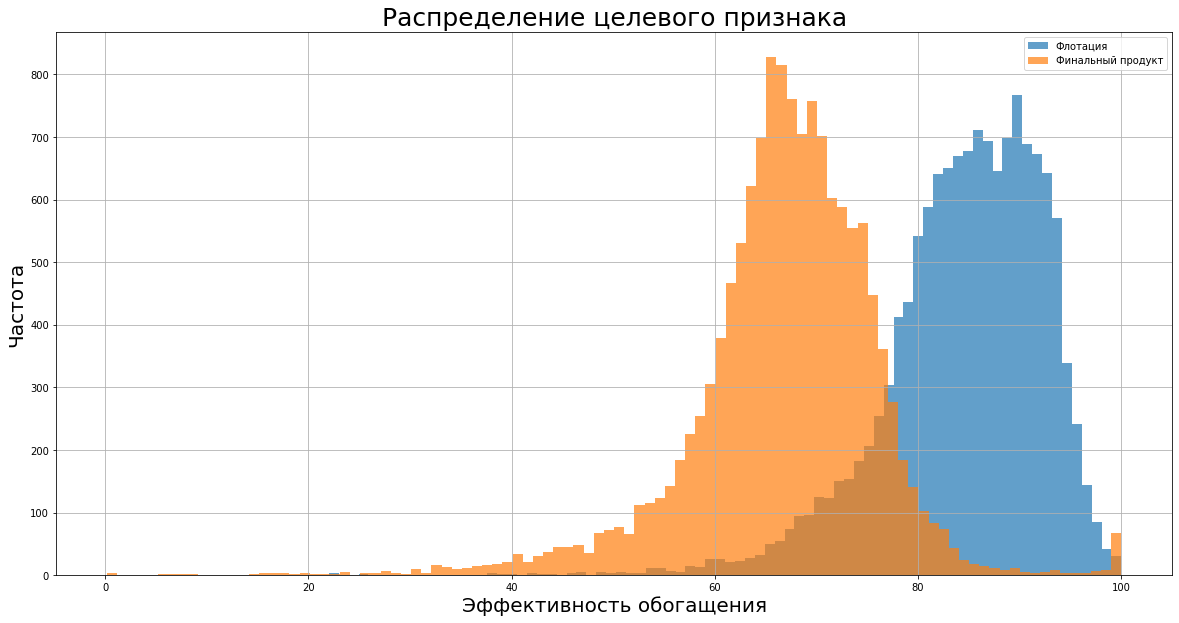

In [61]:
plt.figure(figsize=(20, 10))
data_train['rougher.output.recovery'].hist(bins=100, alpha=0.7)
data_train['final.output.recovery'].hist(bins=100, alpha=0.7)
plt.xlabel('Эффективность обогащения', fontsize=20)
plt.ylabel('Частота', fontsize=20)
plt.title('Распределение целевого признака', fontsize=25)
plt.legend(['Флотация','Финальный продукт']);

Пропуски и выбросы удалены. Теперь нужно подготовить данные для обучения моделей. 

### Подготовка данных для модели

Нам нужно определить эффективность обогащения чернового и финального концентратов. Для этого разделим данные. Для модели, которая будет вычислять эффективность обогащения чернового концентрата выделим данные, которые относятся к этому этапу rougher. Для финального используем все данные. 

In [62]:
data_train.columns

Index(['final.output.recovery', 'primary_cleaner.input.sulfate',
       'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size',
       'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 

In [63]:
data_train_rougher = data_train[['rougher.input.feed_ag', 
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]

In [64]:
data_train_rougher.shape

(13725, 23)

In [65]:
data_test_rougher = data_test[['rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.output.recovery',
       'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level',
       'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level',
       'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level',
       'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level',
       'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level',
       'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level']]

In [66]:
data_test_rougher.shape

(5123, 23)

Для модели, которая определяет эффективность обогащения чернового концентрата rougher.output.recovery, будем использовать данные data_train_rougher для обучения, data_test_rougher - для проверки. 

Для второй модели, которая определяет эффективность обогащения финального концентрата final.output.recovery. используем полные данные data_train и data_test.

Теперь данные готовы, приступим к обучению модели.

## Модель

### Функция для вычисления итоговой sMAPE

Напишем функцию для вычисления итоговой sMAPE.

In [67]:
def sMAPE(target, predictions):
    sMAPE = 1/len(target) * np.sum(2 * np.abs(predictions-target) / (np.abs(target) + np.abs(predictions))*100)
    return sMAPE

Нужно спрогнозировать сразу две величины:

* эффективность обогащения чернового концентрата `rougher.output.recovery`;

* эффективность обогащения финального концентрата `final.output.recovery`.

Итоговая метрика складывается из двух величин:

**sMAPE = 0.25 * sMAPE(rougher) + 0.75* sMAPE(final)**


In [68]:
# Сохраняем метрику для модели
scorer = make_scorer(sMAPE, greater_is_better=False)

In [69]:
# Выделяем признаки и целевые признаки для моделей
features_rougher = data_train_rougher.drop(['rougher.output.recovery'], axis=1)
target_rougher = data_train_rougher['rougher.output.recovery']

features_final = data_train.drop(['final.output.recovery'], axis=1)
target_final = data_train['final.output.recovery']

In [70]:
# Функция для кросс-валидации моделей
def cross_val_func(model, features, target):
    scores = cross_val_score(model, features, target, scoring=scorer, cv=5)
    final_score = scores.mean()
    print('Средняя оценка качества модели:', abs(final_score))

In [71]:
# Линейная регрессия
model = LinearRegression()
cross_val_func(model, features_rougher, target_rougher)
cross_val_func(model, features_final, target_final)

Средняя оценка качества модели: 6.677118661212686
Средняя оценка качества модели: 8.245181484337992


In [72]:
# Пробуем линейную регрессию с масштабированием признаков. Результаты практически не отличаются.
scaler = StandardScaler()
scaler.fit(features_rougher) 
features_rougher_scaled = scaler.transform(features_rougher)
scaler.fit(features_final)
features_final_scaled = scaler.transform(features_final)
model = LinearRegression()
cross_val_func(model, features_rougher_scaled, target_rougher)
cross_val_func(model, features_final_scaled, target_final)

Средняя оценка качества модели: 6.677118661212695
Средняя оценка качества модели: 8.245181484338016


In [73]:
# Дерево решений
model = DecisionTreeRegressor(random_state=12345)
cross_val_func(model, features_rougher, target_rougher)
cross_val_func(model, features_final, target_final)

Средняя оценка качества модели: 8.828501448619857
Средняя оценка качества модели: 14.92774401681786


In [75]:
# Случаный лес
model = RandomForestRegressor(random_state=12345)
cross_val_func(model, features_rougher, target_rougher)
cross_val_func(model, features_final, target_final)

Средняя оценка качества модели: 6.741925632496129
Средняя оценка качества модели: 9.296266145654542


In [76]:
# Фиктивный регрессор для сравнения с моделью
model = DummyRegressor()
cross_val_func(model, features_rougher, target_rougher)
cross_val_func(model, features_final, target_final)

Средняя оценка качества модели: 7.803961504107102
Средняя оценка качества модели: 10.412752300489277


In [77]:
print('Итоговая sMAPE для фиктивного регрессора:', 0.25 * 7.8 + 0.75 * 10.41)

Итоговая sMAPE для фиктивного регрессора: 9.7575


Хорошие результаты показали линейная регрессия и случаный лес. Попробуем изменить параметры случаного леса для улучшения показателей. Будем использовать GridSearchCV. 

In [ ]:
# параметры для подбора модели
grid = { 
    'n_estimators': range (10, 300, 10),
    'max_depth': range (1,13, 2),
}

gd_sr = GridSearchCV(RandomForestRegressor(), 
                     param_grid=grid,
                     scoring=scorer,
                     cv=5,
                     n_jobs=-1)


In [ ]:
gd_sr.fit(features_rougher, target_rougher)
best_parameters = gd_sr.best_params_
print(best_parameters)

In [398]:
gd_sr.fit(features_final, target_final)
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 3, 'n_estimators': 120}


In [78]:
model = RandomForestRegressor(n_estimators=50, max_depth=11, random_state=12345)
cross_val_func(model, features_rougher, target_rougher)

Средняя оценка качества модели: 6.771259568474582


In [79]:
model = RandomForestRegressor(n_estimators=120, max_depth=3, random_state=12345)
cross_val_func(model, features_final, target_final)

Средняя оценка качества модели: 7.873097608698222


* Наилучший результат модели по этапу флотации: линейная регрессия, sMAPE 6,67 
* На финальном этапе случайный лес с n_estimators=120, max_depth=3, sMAPE 7,87

Далее тестируем модель на тестовой выборке.

In [80]:
# отделяем целевые признаки в тестовой выборке
features_test_rougher = data_test_rougher.drop(['rougher.output.recovery'], axis=1)
target_test_rougher = data_test_rougher['rougher.output.recovery']

features_test_final = data_test.drop(['final.output.recovery'], axis=1)
target_test_final = data_test['final.output.recovery']                                               

In [81]:
model_rougher = LinearRegression()
model_rougher.fit(features_rougher, target_rougher)
predictions_rougher = model_rougher.predict(features_test_rougher)
print('Результат модели:', sMAPE(target_test_rougher, predictions_rougher))

Результат модели: 4.495541835305763


In [82]:
model_final = RandomForestRegressor(n_estimators=120, max_depth=3, random_state=12345)
model_final.fit(features_final, target_final)
predictions_final = model_final.predict(features_test_final)
print('Результат модели:', sMAPE(target_test_final, predictions_final))

Результат модели: 8.756321332346863


Вычисляем итоговую sMAPE 

**sMAPE = 0.25 * sMAPE(rougher) + 0.75* sMAPE(final)**

In [83]:
print('Итоговая метрика sMAPE равна:', 0.25 * sMAPE(target_test_rougher, predictions_rougher
                                                   ) + 0.75 * sMAPE(target_test_final, predictions_final) )

Итоговая метрика sMAPE равна: 7.691126458086587


Итоговая метрика составила 7,7, что меньше, чем у фиктивного регрессора (9, 75). 